<a href="https://colab.research.google.com/github/jurewiczM/Projekt_AI_siecNeuronowa/blob/main/neural_network_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Neural Network - CIFER10

Siec neuronowa sekwencyjna. Wszystko napiszę w notatce  i opiszę

In [ ]:
%load_ext tensorboard

import numpy as np
import matplotlib.pyplot as plt
from keras.layers import (Dense, Flatten, Dropout, Conv2D, MaxPooling2D,
                          BatchNormalization)
from keras.models import Sequential
from keras.utils import to_categorical
from keras.datasets import cifar10
from keras.callbacks import ModelCheckpoint
from keras.callbacks import TensorBoard
import tensorflow as tf

import datetime

In [ ]:
#Hiperparametry
BATCH_SIZE = 128


In [ ]:
#Pobranie datasetu
(X_train, y_train),(X_test,y_test) = cifar10.load_data()
print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
print(y_train.shape)

170498071/170498071 [==============================] - 7s 0us/step
(10000, 32, 32, 3)
(50000, 32, 32, 3)
(10000, 1)
(50000, 1)


/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


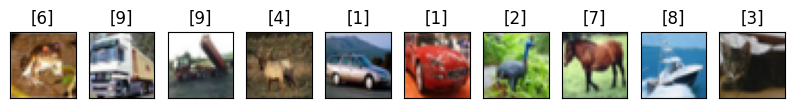

In [ ]:
# Display some images
fig, axes = plt.subplots(ncols=10, sharex=False,
    sharey=True, figsize=(10, 4))
for i in range(10):
    axes[i].set_title(y_train[i])
    axes[i].imshow(X_train[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

# Convert y_train into one-hot format
temp = []
for i in range(len(y_train)):
    temp.append(to_categorical( num_classes=10))
y_train = np.array(temp)
# Convert y_test into one-hot format
temp = []
for i in range(len(y_test)):    
    temp.append(to_categorical( num_classes=10))
y_test = np.array(temp)

print(y_train.shape)
print(y_test.shape)

#Stary kawałek kodu --- poniżej to samo tylko lepsze

In [ ]:
#Stworzenie danych w formacie one hot (opisac co to). Generalnie nie wykorzystane bo inny model nauki jest (sparse_categorical_crossentropy) a nie (categorical_entropy)

y_train_one_hot = to_categorical(y_train,num_classes=10)
y_test_one_hot  = to_categorical(y_test, num_classes=10)
print(y_test_one_hot.shape)
# print(y_train_one_hot.shape)

(10000, 10)


In [ ]:
#do rysowania wykresów
def draw_curves(history, key1='accuracy', ylim1=(0.5, 1.00),
                key2='loss', ylim2=(0.0, 0.5)):
    plt.figure(figsize=(12,4))
    plt.plot(history.history[key1], "r--")
    plt.plot(history.history['val_' + key1], "g--")
    plt.ylabel(key1)
    plt.xlabel('Epoch')
    plt.ylim(ylim1)
    plt.legend(['train', 'test'], loc='best')

    plt.show()


In [ ]:
#generowanie dodatkowych obrazków do nauki. Nie wykorzystane ale można się tym pobawic
from keras.preprocessing.image import ImageDataGenerator
import os as os
train_generate = ImageDataGenerator(rescale = 1./255, #żeby pixele były widziane jako 0-1
                                width_shift_range=0.1, #losowość w szerokości 0.1
                                height_shift_range=0.1, #losowość w długości 0.1
                                horizontal_flip =True, #losowe obracanie obrazka
                                vertical_flip=True) #losowe obrocenie obrazka


train_generated = train_generate.flow(X_train,y_train,batch_size=BATCH_SIZE) # generowanie datasetu do nauki (X oraz y)


#Generowanie dodatkowych obrazków do walidacji

test_generate = ImageDataGenerator(rescale= 1./255) #to samo co przy train generate, ale mniej parametrów bo to dane walidacyjne. Moze trzeba cos innego zrobic tutaj XD
test_generated = train_generate.flow(X_test,y_test,batch_size=BATCH_SIZE) #generowanie datasetu




In [ ]:
train_generated

# Display some images
fig, axes = plt.subplots(ncols=10, sharex=False,
    sharey=True, figsize=(10, 4))
for i in range(10):
    axes[i].set_title(train_generated[i])
    axes[i].imshow(train_generated[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

In [ ]:
#siec neuronowa

model = Sequential() #rodzaj modelu - sekwencyjny
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3))) #warstwa konwolucji Conv2D - funkcja aktywacji:Relu - padding=dodatkowa otoczka pustych pixeli w celu naprawy problemu który powodował duzy loss
model.add(BatchNormalization()) #batch normalization
model.add(Conv2D(32, (3, 3), activation='relu', padding='same')) #wystarczy tylko raz podac wielkosc obrazka, potem bada on to automatycznie (czyta z poprzedniej warstwy)
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2))) #downsampling zdjecia
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu',  padding='same', ))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu',  padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu',  padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu',  padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())


#model.add(Dense(1024,activation='relu')) #warstwa polaczen wszystko do wszystkiego
#model.add(Dense(512,activation="relu"))
#model.add(Dropout(0.2)) #warstwa regularyzacji

#model.add(Dense(256,activation='relu')) #warstwa polaczen wszystko do wszystkiego
#model.add(Dense(128,activation="relu"))
#model.add(Dropout(0.2)) #warstwa regularyzacji


#model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax')) #warstwa wyjscia


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                        

In [ ]:
#kompilacja modelu - optimizer Nadam (Nesterov Adam)

from keras.optimizers import Nadam

optimizer = Nadam(lr=0.005)




In [ ]:
#kompilacja modelu
model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer,metrics=['sparse_categorical_accuracy','accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping
#stoper
earlyStop = EarlyStopping(monitor='loss',
                          patience=5,
                          verbose=1)

In [ ]:
checkpoint  = ModelCheckpoint(filepath='my_best_model.epoch_01-loss_13.32.hdf5' ,monitor='val_loss', verbose=1,save_best_only=True,mode='min') #sposoby na testowanie modelu, niewazne
checkpoint2 = TensorBoard(log_dir='./logs')
callback = [earlyStop] #zebranie wszystkiego w jedna zmienna

#trenowanie modelu
history = model.fit(
          train_generated,
          steps_per_epoch=len(X_train)//BATCH_SIZE,
          epochs=100,
          validation_data= test_generated,
          validation_steps=len(X_test)//BATCH_SIZE,
          callbacks=callback
          )


print("Skonczone")

Epoch 1/100
390/390 [==============================] - 49s 94ms/step - loss: 1.6260 - sparse_categorical_accuracy: 0.4095 - accuracy: 0.0989 - val_loss: 2.6390 - val_sparse_categorical_accuracy: 0.2233 - val_accuracy: 0.0191
Epoch 2/100
390/390 [==============================] - 36s 91ms/step - loss: 1.2596 - sparse_categorical_accuracy: 0.5432 - accuracy: 0.1003 - val_loss: 1.3011 - val_sparse_categorical_accuracy: 0.5427 - val_accuracy: 0.1040
Epoch 3/100
390/390 [==============================] - 36s 92ms/step - loss: 1.0975 - sparse_categorical_accuracy: 0.6040 - accuracy: 0.0998 - val_loss: 1.0677 - val_sparse_categorical_accuracy: 0.6186 - val_accuracy: 0.1051
Epoch 4/100
390/390 [==============================] - 35s 91ms/step - loss: 0.9874 - sparse_categorical_accuracy: 0.6438 - accuracy: 0.1002 - val_loss: 1.0180 - val_sparse_categorical_accuracy: 0.6360 - val_accuracy: 0.0794
Epoch 5/100
390/390 [==============================] - 40s 103ms/step - loss: 0.9183 - sparse_catego

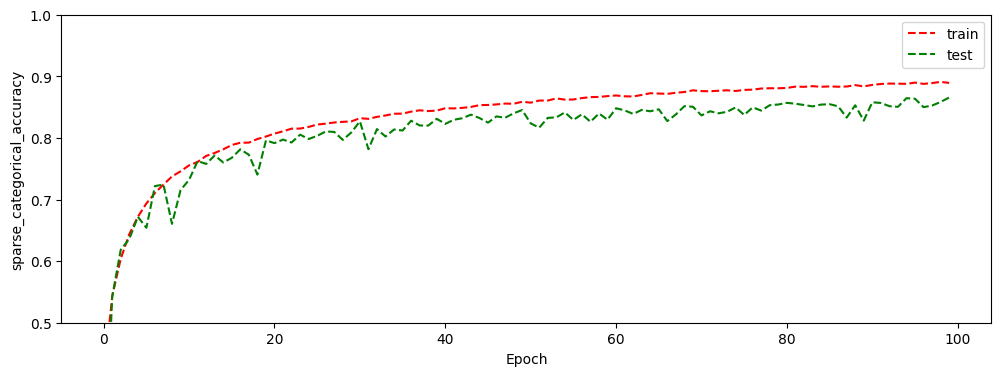

In [ ]:
draw_curves(history,key1='sparse_categorical_accuracy',key2='loss')


In [ ]:
score = model.evaluate(X_test, y_test, verbose=5)


In [ ]:
print((score))

[196.66741943359375, 0.18520000576972961, 0.02810000069439411]


In [ ]:
#od tej sekcji mamy przygotowanie zdjecia i predykcje

from keras.preprocessing import image
img = image.load_img('Auto.jpg',target_size=(32,32))
img_array = image.img_to_array(img)
img_array = img_array.reshape(1,32,32,3)
img_array = img_array.astype('float32')

img_array /= 255.0

In [ ]:

predictions = model.predict(img_array)
print(predictions)

1/1 [==============================] - 0s 18ms/step
[[2.45599166e-01 7.45923877e-01 1.18523662e-03 6.15444384e-04
  6.76702257e-05 1.23539925e-04 1.41101846e-04 1.18813776e-04
  1.58168317e-03 4.64346306e-03]]


In [ ]:
predictions = np.argmax(predictions, axis=-1)
print(predictions)

[1]


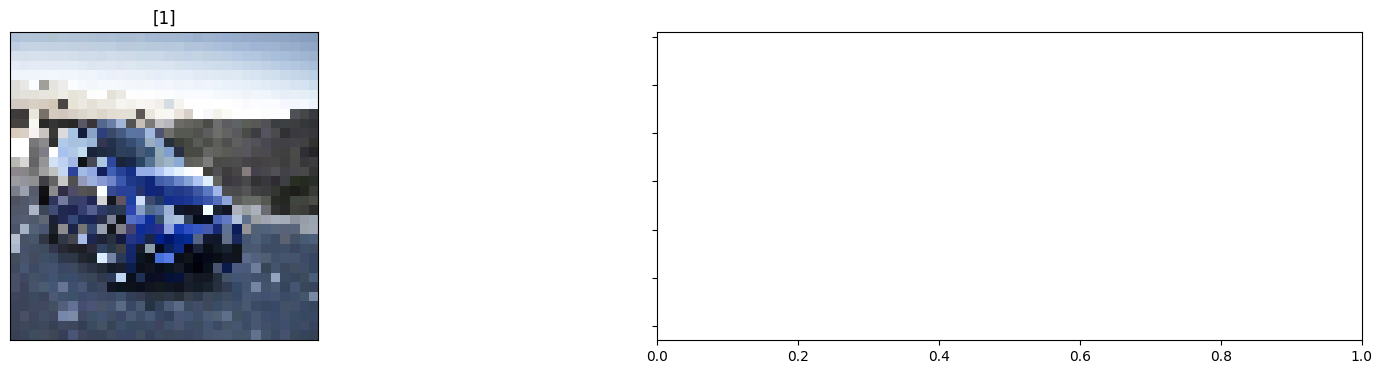

In [ ]:
fig, axes = plt.subplots(ncols=2, sharex=False,
                         sharey=True, figsize=(20, 4))
for i in range(1):
    axes[i].set_title(predictions)
    axes[i].imshow(img)
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

In [ ]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1
